In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import cv2
from tqdm import tqdm
import time

import tensorflow as tf
import tensorflow.keras.backend as K
from skimage.transform import resize
from skimage.io import imread
from skimage import img_as_float32
from sklearn.metrics import confusion_matrix

In [ ]:
#image_data = np.load('/content/drive/MyDrive/data.npy')
#print(image_data.shape)
#x_train = image_data[0:6000]
#x_val = image_data[6000:7500]
#x_test = image_data[7500:]

#x_train2 = image_data[0:7500]
#x_train2 = x_train2/255
#x_train.shape,x_train2.shape

(8508, 224, 224, 3)


((6000, 224, 224, 3), (7500, 224, 224, 3))

In [ ]:
#x_train2_tf = tf.convert_to_tensor(x_train2, dtype=tf.float32)
#type(x_train2_tf)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
#csv_dir = '/content/drive/MyDrive/df_image.csv'
#df = pd.read_csv(csv_dir)

#y_train = df['TYPE'][0:6000] - 1
#y_val = df['TYPE'][6000:7500] - 1
#y_test = df['TYPE'][7500:] - 1
#df['TYPE'][0:6000] - 1

0       0
1       1
2       2
3       3
4       0
       ..
5995    3
5996    0
5997    1
5998    2
5999    3
Name: TYPE, Length: 6000, dtype: int64

In [ ]:
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, num_classes=4)
#y_val = to_categorical(y_val, num_classes=4)
#y_test = to_categorical(y_test, num_classes=4)

#y_train2 = df['TYPE'][0:7500] - 1
#y_train2 = tf.one_hot(y_train2, 4)
#y_train2.shape,type(y_train2)

(TensorShape([7500, 4]), tensorflow.python.framework.ops.EagerTensor)

In [ ]:
#x_test2 = x_test/255
#type(y_test)

numpy.ndarray

In [ ]:
#data = tuple((x_train2_tf,y_train2))
#data_change = tf.data.Dataset.from_tensor_slices(data)
#data_change = data_change.shuffle(7500).batch(25)
#print(len(data_change))

300


In [ ]:
#def lossfunc(layer, y, y_pred):
#  weights = layer.weights[0]
#  weights = tf.convert_to_tensor(weights)
  
#  posit = K.sum(y * y_pred, axis=-1)
#  negat = K.max((1.0 - y) * y_pred, axis=-1)
#  hinge_loss = K.mean(K.maximum(0.0, negat - posit + 1), axis=-1)
#  regularization_loss = 0.5*(tf.reduce_sum(tf.multiply(weights,weights)))
#  return regularization_loss + 0.4*hinge_loss

#def trainfunc(data):
#  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=1.e-3)#tf.optimizers.Adam()
#  for epoch in range(20):
#    losslist = []
#    acclist = list()



#    for input_image, target in data:
#      with tf.GradientTape() as g:
#        input_image = tf.Variable(input_image)
#        model_out = model(input_image)
#        model_loss = lossfunc(model.get_layer('fc4'), target, model_out)
        
#      gradients = g.gradient(model_loss, model.variables)
#      optimizer.apply_gradients(zip(gradients, model.variables))#optimizer.apply_gradients(zip(gradients, model.variables))
#      losslist.append(model_out)
        ###############print(model_out)
#      temp = tf.math.equal(tf.argmax(model_out, axis=1, output_type=tf.int32), tf.argmax(target, axis=1, output_type=tf.int32))
#      acclist= acclist + [temp]
#    myloss = tf.reduce_sum(losslist)
#    acclist = tf.cast(acclist, tf.float32)
#    myacc = tf.reduce_sum(acclist)
        
#    print('at Epoch :', epoch, '   Loss:', myloss, ', Accuracy:', myacc)
  


#model=Sequential()
#model.add(VGG19(weights='imagenet',include_top=False))
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1024,activation='relu',name='fc1'))
##model.add(Dense(512,activation='relu',name='fc2'))
#model.add(Dense(512,activation='relu',name='fc3'))
#model.add(Dense(128,activation='relu',name='fc33'))
#model.add(Dense(32,activation='relu',name='fc333'))
#####model.add(Dropout(0.5))
#model.add(Dense(4,activation='linear', use_bias=False, name='fc4'))

#model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=['accuracy'])
#print(model.summary())

#model.fit(x_train,y_train, epochs=20, validation_data=(x_val,y_val))

#model.pop() # this will remove the last layer
#print(model.summary()) # check the network

#feature_mapping = model(x_train)


#trainfunc(data_change)

at Epoch : 0    Loss: tf.Tensor(-335.79437, shape=(), dtype=float32) , Accuracy: tf.Tensor(1920.0, shape=(), dtype=float32)
at Epoch : 1    Loss: tf.Tensor(32.535133, shape=(), dtype=float32) , Accuracy: tf.Tensor(1839.0, shape=(), dtype=float32)
at Epoch : 2    Loss: tf.Tensor(1.9671997, shape=(), dtype=float32) , Accuracy: tf.Tensor(1904.0, shape=(), dtype=float32)
at Epoch : 3    Loss: tf.Tensor(0.010641733, shape=(), dtype=float32) , Accuracy: tf.Tensor(1830.0, shape=(), dtype=float32)
at Epoch : 4    Loss: tf.Tensor(0.010439914, shape=(), dtype=float32) , Accuracy: tf.Tensor(1881.0, shape=(), dtype=float32)
at Epoch : 5    Loss: tf.Tensor(0.013051088, shape=(), dtype=float32) , Accuracy: tf.Tensor(1921.0, shape=(), dtype=float32)
at Epoch : 6    Loss: tf.Tensor(0.013270622, shape=(), dtype=float32) , Accuracy: tf.Tensor(1839.0, shape=(), dtype=float32)
at Epoch : 7    Loss: tf.Tensor(0.008442797, shape=(), dtype=float32) , Accuracy: tf.Tensor(1894.0, shape=(), dtype=float32)
at Ep

In [ ]:
model.save('/content/drive/MyDrive/cnnsvmMOD.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/cnnsvmMOD.h5')

In [ ]:
count=0
for i in range(x_test.shape[0]):
  testarr = np.expand_dims(x_test[i], axis=0)
  testout = model(testarr).numpy()[0]
  ans=tf.math.equal(tf.argmax(testout, output_type=tf.int32),tf.argmax(y_test2[i], output_type=tf.int32))
  if ans:
    count += 1
print(count/x_test.shape[0])
#y_test[0]
#print('Loss and accuracy for test data')
#print('loss: ', score[0], '    accuracy: ', score[1])

0.8928571428571429


In [ ]:
def ds_map(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.reshape(image, [28,28,1])
  image = image/255.
  label = tf.one_hot(label,10)
  return image, label
train, test = tf.keras.datasets.mnist.load_data()
print(type(train),len(train),type(train[0]),type(train[1]))
print(train[0].shape,train[1].shape)
qwe=tf.data.Dataset.from_tensor_slices(train)
print(type(qwe))
qwe=qwe.map(ds_map).shuffle(60000).batch(32)
print(qwe)
print(type(qwe),len(qwe))
i=0
#for input_image, target in qwe:
#  i=i+1
#  print(type(input_image), type(target), i)
#qwe = x_train[0]
#print(qwe.shape)
#np.expand_dims(qwe, axis=0).shape
#qwe = tuple((x_train,y_train))
#len(qwe)

qwe=list()
qwe = qwe+[1]
qwe = qwe+[2]
qwe

<class 'tuple'> 2 <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'> 1875


[1, 2]

In [ ]:
######################sigmoid
csv_dir = '/content/drive/MyDrive/df_image.csv'
df = pd.read_csv(csv_dir)
y=df['TYPE'].to_numpy()
for i in range(y.shape[0]):
  if y[i]==1:
    y[i]=0#-1
  else:
    y[i]=1
y_train = y[0:6000]
y_val = y[6000:7500]
y_test = y[7500:]
y_train[0:20]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
image_data = np.load('/content/drive/MyDrive/data.npy')
print(image_data.shape)
x_train = image_data[0:6000]
x_val = image_data[6000:7500]
x_test = image_data[7500:]

x_train = x_train/255
x_val = x_val/255
x_test = x_test/255
print(x_train.shape,x_val.shape,x_test.shape)

(8508, 224, 224, 3)
(6000, 224, 224, 3) (1500, 224, 224, 3) (1008, 224, 224, 3)


In [ ]:
#model = Sequential()
#model.add(VGG19(weights='imagenet',include_top=False))
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(2, activation='sigmoid'))#model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

#model.summary()
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in vgg19_model.layers:
    layer.trainable = False


model = Sequential()
model.add(vgg19_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(500, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(2, activation="sigmoid"))
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 500)               256500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 20,381,486
Trainable params: 357,102
Non-trainable params: 20,024,384
______________________________________

In [ ]:
y_train2 = tf.one_hot(y_train,2)
y_val2 = tf.one_hot(y_val,2)
y_test2 = tf.one_hot(y_test,2)
y_train2


<tf.Tensor: shape=(6000, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [ ]:
mod_for_print = model.fit(x_train, y_train2, epochs=20, validation_data=(x_val,y_val2))
#model.save('/content/drive/MyDrive/cnnsigMOD.h5')

Epoch 1/20
188/188 [==============================] - 59s 240ms/step - loss: 0.4249 - accuracy: 0.7948 - val_loss: 0.3141 - val_accuracy: 0.8567
Epoch 2/20
188/188 [==============================] - 42s 223ms/step - loss: 0.3160 - accuracy: 0.8517 - val_loss: 0.2795 - val_accuracy: 0.8747
Epoch 3/20
188/188 [==============================] - 43s 230ms/step - loss: 0.2816 - accuracy: 0.8713 - val_loss: 0.2598 - val_accuracy: 0.8900
Epoch 4/20
188/188 [==============================] - 44s 237ms/step - loss: 0.2757 - accuracy: 0.8748 - val_loss: 0.2711 - val_accuracy: 0.8713
Epoch 5/20
188/188 [==============================] - 46s 243ms/step - loss: 0.2547 - accuracy: 0.8877 - val_loss: 0.2502 - val_accuracy: 0.8920
Epoch 6/20
188/188 [==============================] - 47s 249ms/step - loss: 0.2507 - accuracy: 0.8880 - val_loss: 0.2367 - val_accuracy: 0.8960
Epoch 7/20
188/188 [==============================] - 47s 253ms/step - loss: 0.2404 - accuracy: 0.8908 - val_loss: 0.2422 - val_ac

In [ ]:
count=0
for i in range(x_test.shape[0]):
  testarr = np.expand_dims(x_test[i], axis=0)
  testout = model(testarr).numpy()[0]
  ans=tf.math.equal(tf.argmax(testout, output_type=tf.int32),tf.argmax(y_test2[i], output_type=tf.int32))
  if ans:
    count += 1
print(count/x_test.shape[0])
#manually check

0.8928571428571429


In [ ]:
model = load_model('/content/drive/MyDrive/cnnsvmclassfMOD.h5')
model.evaluate(x_test, y_test2)

32/32 [==============================] - 6s 166ms/step - loss: 0.2812 - accuracy: 0.8929


[0.28121981024742126, 0.8928571343421936]

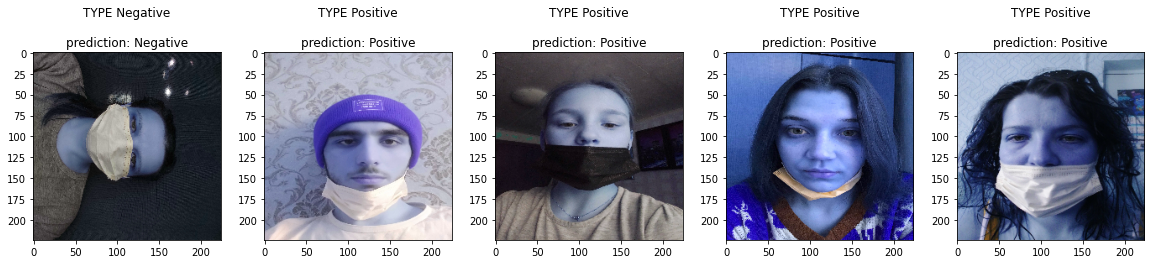

In [ ]:
rand_pic_idx = np.random.randint(0, 8508-7500, 5)
typo = {0: 'Negative', 1: 'Positive'}
plt.figure(figsize=(20,20))
for i in range(5):
  prediction = np.argmax(model.predict(np.expand_dims(x_test[rand_pic_idx[i]], axis=0))[0])
  
  plt.subplot(5, 5, i+1)
  plt.imshow(x_test[rand_pic_idx[i]])   
  plt.title('TYPE ' + typo[df['TYPE'][rand_pic_idx[i]+7500]] + '\n\nprediction: ' + typo[prediction])
plt.show()


In [ ]:
#from winotify import Notification, audio
#def alertfunc():
#  toast = Notification(app_id="alert_mask", title="ALERT!!", msg="Potential Mask Rule Broker Detected!", duration="short")
#  toast.show()

#Above code are not executable on colab, use below to test the alert function
#
def alertfunc():
  print("\033[31m \033[1m Alert, Potential Mask Rule Broker Detected!")

In [ ]:
paths = '/content/060004_4_028452_MALE_31.jpg'
start = time.time()
image = img_as_float32(imread(paths))
image = resize(image,(224,224,3),anti_aliasing=True)

ans = np.argmax(model.predict(np.expand_dims(x_test[rand_pic_idx[i]], axis=0))[0])
if (ans==1):
  alertfunc()
end = time.time()

print('it take', end - start, 'sec to process one image') 

  Alert, Potential Mask Rule Broker Detected!
it take 7.228940486907959 sec to process one image


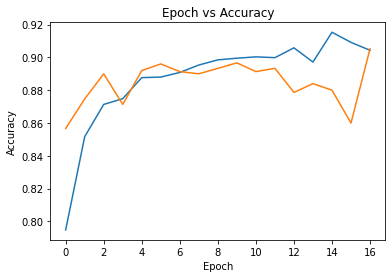

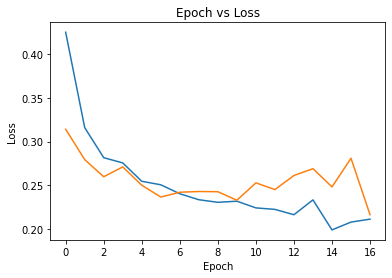

In [ ]:
plt.plot(mod_for_print.history['accuracy'], label='train')
plt.plot(mod_for_print.history['val_accuracy'], label='validation')
plt.title('Epoch vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(mod_for_print.history['loss'], label='train')
plt.plot(mod_for_print.history['val_loss'], label='validation')
plt.title('Epoch vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

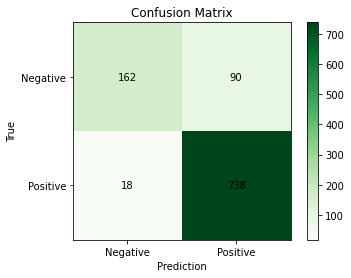

Precision: 0.895652
Recall: 0.809524


In [ ]:
temp=model.predict(x_test)
y_pred = np.argmax(temp,axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()

for i in range(len(cm)):
  for j in range(len(cm)):
    plt.annotate(cm[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Prediction')
plt.xticks(range(0,2), labels=['Negative','Positive'])
plt.yticks(range(0,2), labels=['Negative','Positive'])
plt.show()
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

precision = np.mean(TP / (TP + FP))
recall = np.mean(TP / (TP + FN))

print('Precision: {:.6f}' .format(precision))
print('Recall: {:.6f}' .format(recall))